In [2]:
def folder_setup():
    current_dir = os.getcwd()
    os.chdir('..')
    base_path = os.getcwd()
    data_folder = (os.path.join(base_path,'data'))
    output_folder = (os.path.join(base_path,'outputs'))
    return base_path, data_folder,output_folder

In [1]:
import os
import function_list

ModuleNotFoundError: No module named 'function_list'

In [ ]:
base_path, data_folder, outputs = function_list.folder_setup()
os.chdir(data_folder)
poke = pd.read_csv('poke.csv')
function_list.convert_datetime(poke)

In [16]:
year_count = poke.pivot_table('BUSINESS NAME',index='LOCATION START DATE',aggfunc='count').resample('AS').sum()
year_count.fillna(0,inplace=True)
year_count = year_count[0:-1] #remove 2017

In [94]:
def line_chart(x,y,xlabel=None,ylabel=None,title=title,
               figsize=(11,8),title_font=20,top=.9,labelsize=18,tickmarksize=16,
              source=source,chart_tag='www.igotcharts.com, 2017',source_y=-.16,chart_tag_y=-.19,linewidth=2,linecolor='Black'):

    fig = figure(figsize=figsize)
    fig.suptitle(title,fontsize=title_font)
    ax = fig.add_subplot(111)
    plt.subplots_adjust(top=top)
    plt.plot(x,y,linewidth=linewidth,color=linecolor,clip_on=False)

    #set the x and y axis limits

    ax.set_xlim(x.min(),x.max())
    ax.set_ylim(y.min(),y.max())

    #set the tick intervals - need to add
    
    #label axes
    ax.set_xlabel(xlabel,fontsize=labelsize)
    ax.set_ylabel(ylabel,fontsize=labelsize)
    
    ax.grid(alpha=.4)

    #format tick labels
    ax.tick_params(axis='both', which='major', labelsize=tickmarksize,labelcolor='#737373',pad=10)

    ax.text(0,source_y,source,transform=ax.transAxes,fontsize=14,alpha=.4)

    ax.text(0,chart_tag_y,chart_tag,transform=ax.transAxes,fontsize=14,alpha=.4)

    return fig, ax

(-0.1, 35)

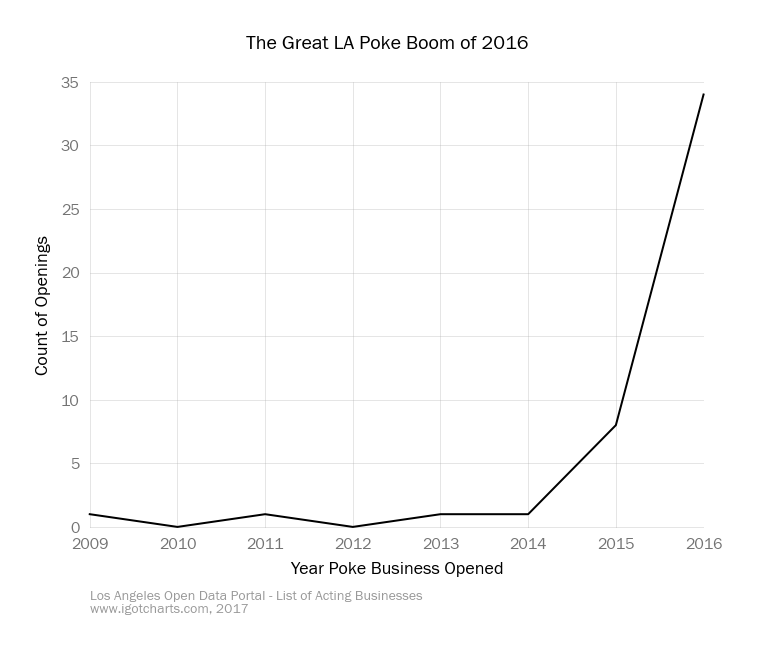

In [95]:
line_chart(x=year_count.index.year,y=year_count.values,xlabel = 'Year Poke Business Opened', ylabel = 'Count of Openings',
           title='The Great LA Poke Boom of 2016',source='Los Angeles Open Data Portal - List of Acting Businesses')
ax = plt.gca()
ax.set_ylim(-.1,35)
